<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia



## PDEs  02. The Linear Advection Equation

### About this notebook

In this notebook we present some of the techniques used to solve the linear advection equation.

`A. Garcia. Numerical Methods for Physics. (1999). Chapter 6 - 7 `

---

## The Linear Advection Equation

An example of the **first-order hyperbolic systems** in one spatial dimension is the **linear advection equation**, in which the function $u=u(t,x)$ satisfies

\begin{equation}
\partial_t u + v \partial_x u = 0\,\,,
\end{equation}

which is first order, linear, and homogeneous. An exact
solution of this equation is given by any function depending on the arguments

\begin{equation}
u(t,x) = u(t=0,x-vt)\,\,.
\end{equation}

Hence, the advection equation does (as one might expect) just translate
the given data along the x-axis with constant advection velocity $v$.


---

## Methods of Solution for the Advection Equation

### 1. FTCS Discretization

Using a **F**orward in **T**ime, **C**entered in **S**pace (FTCS) Discretization in the advection equation gives the relation

\begin{equation}
  u^{(n+1)}_j = u^{(n)}_j - \frac{v \Delta t}{2\Delta x} \left(u^{(n)}_{j+1} - u^{(n)}_{j-1}\right)\,\,.
\end{equation}

Note that the index $n$ refers to the time discretization while the index $j$ refers to the spatial discretization. In this method, the definion of the grid needs some kind of criteria to introduce the boundary conditions.


The stability of this method is analized by introducing the function $u(x,t^{n}) = u^{(n)} = e^{ikx}$ into the discretized  equation. This gives

\begin{equation}
\begin{aligned}
u^{(n+1)}_j &= e^{ik j\Delta x } - \frac{v \Delta t}{2\Delta x} \left(e^{ik (j+1)\Delta x } - e^{ik (j-1) \Delta x }\right)\,\,,\\
&= \left[ 1 - \frac{v\Delta t}{2 \Delta x} \left( e^{ik\Delta x} - e^{-ik\Delta x} \right) \right] e^{ik j \Delta x }\,\,,\\
&= \underbrace{\left[ 1- \frac{v\Delta t}{\Delta x} i \sin(k\Delta x) \right]}_{{=\xi}} e^{ik\Delta x j}\,\,,
\end{aligned}
\end{equation}

where the coefficient satisfies 

\begin{equation}
|\xi| = \sqrt{\xi \xi^*} = \sqrt{1 + \left(\frac{v\Delta t}{\Delta x} \sin(k\Delta x)\right)^2} > 1\,\,.
\end{equation}

This result implies that the FTCS method is **unconditionally unstable** for the
advection equation!

### Example
Advection is an important process in many aspects of astrophysics. For example, some transport models consider shock-accelerated particle distributions in the heliosphere ( ver Litvinenko2014) that are described, in a first approximation, by a one-dimensional advection-difussion equation for the particle density. In the weak diffusion approximation the equation to solve is

\begin{equation}
\frac{\partial u}{\partial t} + v\frac{\partial u}{\partial x} = 0\,\,,
\end{equation}

where $v$ is a constant advection speed that can be interpreted as the background solar wind speed.

As a first example in solving partial differential equations, we will use this equation to advect a Gaussian profile

\begin{equation}
 \Psi_0 = \Psi(x,t=0) = e^{-\frac{(x-x_0)^2 }{(2 \sigma^2)}},
 \end{equation}
 
 with $x_0 = 30$, $\sigma = \sqrt{15}$, with positive
velocity $v = 0.1$ in a $[0,100]$ domain.

**IMPORTANT NOTE:** In order to handle the boundaries, we will choose **outflow boundary
conditions**, that simply copy the data of the last interior grid point into the
boundary points.

dt =  0.07000700070007
dx =  0.1001001001001001


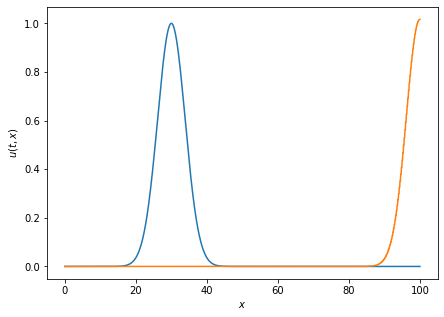

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Definition of the initial Gaussian profile
def Psi(x):
    x0 = 30. 
    sigma = np.sqrt(15.)
    return np.exp(-(x-x0)**2/(2*sigma**2))

# Definition of the grids
x_i = 0.
x_f = 100.
xgrid = np.linspace(x_i, x_f, 1000)
dx = xgrid[1] - xgrid[0]

t_i = 0.
t_f = 700.
tgrid = np.linspace(t_i, t_f, 10000)
dt = tgrid[1] - tgrid[0]


# Velocity of the advection
v = 0.1

# FTCS Method
def FTCS(u):
    unew = np.zeros(len(xgrid))
    for j in range(1,len(xgrid)-1):
        unew[j] = u[j] - ((v*dt)/(2*dx))*(u[j+1] - u[j-1])
                                                     
    # Boundary conditions
    unew[0] = unew[1]
    unew[len(unew)-1] = unew[len(unew)-2]
    
    return unew



# Time evolution to obtain the state of the profile at t_f                                               
u = Psi(xgrid)
for t in tgrid:
    u = FTCS(u)

                                                     
print('dt = ', dt)
print('dx = ', dx)
plt.figure(figsize=(7,5))
plt.plot(xgrid, Psi(xgrid))
plt.plot(xgrid, u)
plt.xlabel(r'$x$')
plt.ylabel(r'$u(t,x)$')
plt.show()


---
## Temporal Evolution of the Solution

We can create an animated movie with the temporal evolution of the solution using the `matplotlib.pyplot.animation` function and the `HTML` package to display the animation in the jupyter notebook as a javascript widget.


First, we modify our solution algorithm to store the time evolution information into an array.

dt =  0.1000100010001
dx =  0.1001001001001001


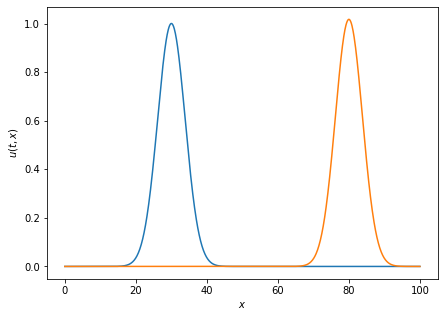

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Definition of the initial Gaussian profile
def Psi(x):
    x0 = 30. 
    sigma = np.sqrt(15.)
    return np.exp(-(x-x0)**2/(2*sigma**2))

# Definition of the grids
x_i = 0.
x_f = 100.
xgrid = np.linspace(x_i, x_f, 1000)
dx = xgrid[1] - xgrid[0]


t_i = 0.
t_f = 1000.
tgrid = np.linspace(t_i, t_f, 10000)
dt = tgrid[1] - tgrid[0]


# Velocity of the advection
v = 0.1

# FTCS Method
def FTCS(u):
    unew = np.zeros(len(xgrid))
    for j in range(1,len(xgrid)-1):
        unew[j] = u[j] - ((v*dt)/(2*dx))*(u[j+1] - u[j-1])
    unew[0] = unew[1]
    unew[len(unew)-1] = unew[len(unew)-2]
    return unew


u_data = np.zeros([len(tgrid), len(xgrid)])
u_data[0,:] = FTCS(Psi(xgrid))


for i in range(1,len(tgrid)):
    u_data[i,:] = FTCS(u_data[i-1,:])



print('dt = ', dt)
print('dx = ', dx)
plt.figure(figsize=(7,5))
plt.plot(xgrid, u_data[0,:])
plt.plot(xgrid, u_data[5000,:])
plt.xlabel(r'$x$')
plt.ylabel(r'$u(t,x)$')
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

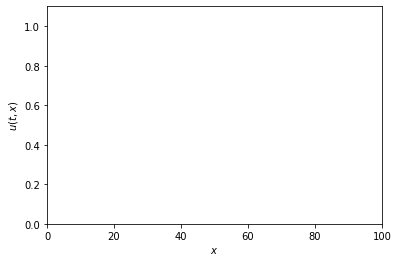

In [11]:
# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 100))
ax.set_ylim((0, 1.1))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(t,x)$')

line, = ax.plot([], [], lw=2)

In [12]:
# Define the initialization function, which plots the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [13]:
def animate(i):
    x = xgrid
    y = u_data[50*i,:] # We take only some of the frames (given by 50*i)
    line.set_data(x, y)
    return (line,)

In [14]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20,  # only 200 frames with a duration of 20 each
                               blit=True)

In [15]:
HTML(anim.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.

### Stability of the Method

As shown before, the FTCS method is **unconditionally unstable** for the advection equation. I order to show this behavior in practice, consider the advection of a sinuosidal perturbation with periodic boundaries. Using a temporal step of $dt=0.02$, the advection in the interval $[0, 350]$ has a good behavior,

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

# Definition of the grids
x_i = 0.
x_f = 100.
xgrid = np.linspace(x_i, x_f, 1000)
dx = xgrid[1] - xgrid[0]

t_i = 0.
t_f = 350.
dt = 0.02
tgrid = np.arange(t_i, t_f, dt)

# Definition of the initial Sin profile
def Psi(x):
    return np.sin(4*np.pi*x/x_f)

# Velocity of the advection
v = 0.1

# FTCS Method
def FTCS(u):
    unew = np.zeros(len(xgrid))
    for j in range(1,len(xgrid)-1):
        unew[j] = u[j] - ((v*dt)/(2*dx))*(u[j+1] - u[j-1])
    # Periodic boundary conditions 
    unew[0] = unew[len(unew)-2]
    unew[len(unew)-1] = unew[1]
    return unew

u_data = np.zeros([len(tgrid), len(xgrid)])
u_data[0,:] = FTCS(Psi(xgrid))


for i in range(1,len(tgrid)):
    u_data[i,:] = FTCS(u_data[i-1,:])


# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 100))
ax.set_ylim((-1.1, 1.1))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(t,x)$')

line, = ax.plot([], [], lw=2)

# Define the initialization function, which plots the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = xgrid
    step = int(len(tgrid)/200)
    y = u_data[step*i,:] # We take only some of the frames (given by 50*i)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20,  # only 200 frames with a duration of 20 each
                               blit=True)

HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

However, using a longer interval, $[0,700]$, the unstable behavior appears,

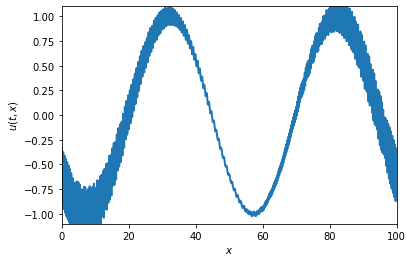

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

# Definition of the grids
x_i = 0.
x_f = 100.
xgrid = np.linspace(x_i, x_f, 1000)
dx = xgrid[1] - xgrid[0]

t_i = 0.
t_f = 700.
dt = 0.02
tgrid = np.arange(t_i, t_f, dt)

# Definition of the initial Sin profile
def Psi(x):
    return np.sin(4*np.pi*x/x_f)

# Velocity of the advection
v = 0.1

# FTCS Method
def FTCS(u):
    unew = np.zeros(len(xgrid))
    for j in range(1,len(xgrid)-1):
        unew[j] = u[j] - ((v*dt)/(2*dx))*(u[j+1] - u[j-1])
    # Periodic boundary conditions 
    unew[0] = unew[len(unew)-2]
    unew[len(unew)-1] = unew[1]
    return unew

u_data = np.zeros([len(tgrid), len(xgrid)])
u_data[0,:] = FTCS(Psi(xgrid))


for i in range(1,len(tgrid)):
    u_data[i,:] = FTCS(u_data[i-1,:])


# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 100))
ax.set_ylim((-1.1, 1.1))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(t,x)$')

line, = ax.plot([], [], lw=2)

# Define the initialization function, which plots the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = xgrid
    step = int(len(tgrid)/200)
    y = u_data[step*i,:] # We take only some of the frames (given by 50*i)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20,  # only 200 frames with a duration of 20 each
                               blit=True)

HTML(anim.to_jshtml())

In [ ]:
HTML(anim.to_html5_video())